In [1]:
from IPython.display import Image
import sympy as sp
import math
import numpy as np
import datetime

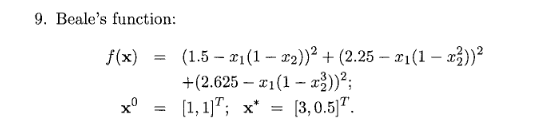

In [2]:
Image(filename='/Users/wy/Desktop/beales_function.png')

In [3]:
class GoldSearch(object):

    def  __init__(self):
        self.l = 10**-5
        self.alpha = (math.sqrt(5)-1)/2.

    def g_lambda(self, a, b):
        return a+(1-self.alpha)*(b-a)

    def g_mu(self, a, b):
        return a+self.alpha*(b-a)

    def goldSearch(self, a, b,lambda_k,mu_k,function,k = 1):
        # step1
        if (b - a) < self.l:
            return (a+b)/2.

        if function(lambda_k) > function(mu_k):
            # step2
            a = lambda_k
            b = b
            lambda_k = mu_k
            mu_k = self.g_mu(a,b)
            k = k+1
            return self.goldSearch(a,b,lambda_k,mu_k,function,k)

        elif function(lambda_k) <= function(mu_k):
            # step3
            a = a
            b = mu_k
            mu_k = lambda_k
            lambda_k = self.g_lambda(a,b)
            k = k+1
            return self.goldSearch(a,b,lambda_k,mu_k,function,k)
GoldSearch = GoldSearch()

In [4]:
def gradient(f):
    return [sp.lambdify((x1,x2), f.diff(x, 1), 'numpy') for x in [x1,x2]]

# Fletcher_Reeves
初始點 (1,1)  
GoldSearch interval -5 ~ 5  
e = 10**-5  
number of iterations : 24  
run time : 0.91s

In [5]:
def Fletcher_Reeves(f,xj):
    lambda_j = sp.symbols('lambda_j')
    e = 10**-5
    sj = np.array(map(lambda fun : fun( xj[0],xj[1] ),gradient(f)))*(-1)
    i = 1
    while np.linalg.norm(sj) > e:
        i = i+1
        tmp = xj+lambda_j*sj
        new_f = f.subs([(x1,tmp[0]),(x2,tmp[1])])
        lambdaJ = GoldSearch.goldSearch(a,b,GoldSearch.g_lambda(a,b),GoldSearch.g_mu(a,b),sp.lambdify(lambda_j , new_f))
        xj_1 = xj+lambdaJ*sj
        sj_1 = np.array(map(lambda fun : fun( xj_1[0],xj_1[1] ),gradient(f)))*(-1)
        beta_j = np.dot(sj_1.T,sj_1)/np.dot(sj.T,sj)
        sj_1 = sj_1+beta_j*sj
        sj = sj_1
        xj = xj_1
    return xj_1,i

In [6]:
a = -5
b = 5
x1,x2 = sp.symbols('x1,x2')
f = (1.5-x1*(1-x2))**2 + (2.25-x1*(1-x2**2))**2 + (2.625-x1*(1-x2**3))**2
# 初始點
xj = np.array([1,1])
start = datetime.datetime.now()
xj_1,i = Fletcher_Reeves(f,xj)
end = datetime.datetime.now()
print xj_1
print i
print end - start

[ 3.00000314  0.50000078]
24
0:00:00.916073


# DFP
初始點 (1,1)  
GoldSearch interval -5 ~ 5  
e = 10**-5  
number of iterations : 8  
run time : 0.34s

In [7]:
def DFP(f,xi):
    lambda_i = sp.symbols('lambda_i')
    e = 10**-3
    gradient_f = (np.array(map(lambda fun : fun( xi[0],xi[1] ),gradient(f)))).reshape(2,1)
    Bi = np.identity(2)
    i = 0
    while abs(np.linalg.norm(gradient_f)) > e:
        i = i+1
        si = (np.dot(Bi,gradient_f)*(-1)).reshape(1,2)[0]
        tmp = xi+lambda_i*si
        new_f = f.subs([(x1,tmp[0]),(x2,tmp[1])])
        lambdaI = GoldSearch.goldSearch(a,b,GoldSearch.g_lambda(a,b),GoldSearch.g_mu(a,b),sp.lambdify(lambda_i , new_f))
        xi_1 = xi+lambdaI*si
        gradient_f_1 = (np.array(map(lambda fun : fun( xi_1[0],xi_1[1] ),gradient(f)))).reshape(2,1)
        if abs(np.linalg.norm(gradient_f_1)) > e:
            gi = (gradient_f_1 - gradient_f).reshape(1,2)[0]
            Mi = (np.dot(si.reshape(2,1),si.reshape(2,1).T))*lambdaI/np.dot(si.T,gi)
            Ni = np.dot(np.dot(Bi,gi).reshape(2,1),np.dot(Bi,gi).T.reshape(1,2))*(-1)/np.dot(np.dot(gi.T,Bi),gi)
            Bi = Bi+Mi+Ni
            xi = xi_1
            gradient_f = (np.array(map(lambda fun : fun( xi[0],xi[1] ),gradient(f)))).reshape(2,1)
        else:
            return xi_1,i

In [8]:
a = -5
b = 5
x1,x2 = sp.symbols('x1,x2')
f = (1.5-x1*(1-x2))**2 + (2.25-x1*(1-x2**2))**2 + (2.625-x1*(1-x2**3))**2
xi = np.array([1,1])

start = datetime.datetime.now()
xi_1,i = DFP(f,xi)
end = datetime.datetime.now()
print xi_1
print i
print end - start

[ 3.00002223  0.49998904]
8
0:00:00.343704


# BFGS
初始點 (1,1)  
GoldSearch interval -5 ~ 5  
e = 10**-5  
number of iterations : 8  
run time : 0.38s

In [9]:
def BFGS(f,xi):
    lambda_i = sp.symbols('lambda_i')
    e = 10**-3
    gradient_f = (np.array(map(lambda fun : fun( xi[0],xi[1] ),gradient(f)))).reshape(2,1)
    Bi = np.identity(2)
    i = 0
    while abs(np.linalg.norm(gradient_f)) > e:
        i = i+1
        si = (np.dot(Bi,gradient_f)*(-1)).reshape(1,2)[0]
        tmp = xi+lambda_i*si
        new_f = f.subs([(x1,tmp[0]),(x2,tmp[1])])
        lambdaI = GoldSearch.goldSearch(a,b,GoldSearch.g_lambda(a,b),GoldSearch.g_mu(a,b),sp.lambdify(lambda_i , new_f))
        xi_1 = xi+lambdaI*si
        gradient_f_1 = (np.array(map(lambda fun : fun( xi_1[0],xi_1[1] ),gradient(f)))).reshape(2,1)
        if abs(np.linalg.norm(gradient_f_1)) > e:
            gi = (gradient_f_1 - gradient_f).reshape(1,2)[0]
            di = xi_1-xi
            Mi = ((1 + np.dot(np.dot(gi.T,Bi),gi)/np.dot(di.T,gi))*np.dot(di.reshape(2,1),di.reshape(1,2)))/np.dot(di.T,gi)
            Ni = np.dot(np.dot(di.reshape(2,1),gi.reshape(1,2)),Bi)*(-1)/np.dot(di.T,gi)
            Qi = np.dot(np.dot(Bi,gi).reshape(2,1),di.reshape(1,2))*(-1)/np.dot(di.T,gi)
            Bi = Bi+Mi+Ni+Qi
            xi = xi_1
            gradient_f = (np.array(map(lambda fun : fun( xi[0],xi[1] ),gradient(f)))).reshape(2,1)
        else:
            return xi_1,i

In [10]:
a = -5
b = 5
x1,x2 = sp.symbols('x1,x2')
f = (1.5-x1*(1-x2))**2 + (2.25-x1*(1-x2**2))**2 + (2.625-x1*(1-x2**3))**2
xi = np.array([1,1])

start = datetime.datetime.now()
xi_1,i = BFGS(f,xi)
end = datetime.datetime.now()
print xi_1
print i
print end - start

[ 3.00002222  0.49998909]
8
0:00:00.389444


In [11]:
from scipy.optimize import fmin

def fun(X):
    return (1.5-X[0]*(1-X[1]))**2 + (2.25-X[0]*(1-X[1]**2))**2 + (2.625-X[0]*(1-X[1]**3))**2

fmin(fun,np.array([1,1]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 107


array([ 3.00002489,  0.50000749])

# scipy python做科學計算的lib
出處 ： http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html#scipy.optimize.fmin  
Minimize a function using the downhill simplex algorithm.  
This algorithm only uses function values, not derivatives or second derivatives.  